In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_columns', 100)

In [3]:
data = pd.read_csv('Datasets/Project_Data_1.csv',index_col=0, decimal=",")
data.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
Sales of Wheat in tons,,,,,,,,,,,,,,,,,,
Afghanistan,436.0,429.0,422.0,415.0,407.0,397.0,397,387,374,373,346,326,304,308,283.0,267.0,251.0,238.0
Albania,42.0,40.0,41.0,42.0,42.0,43.0,42,44,43,42,40,34,32,32,29.0,29.0,26.0,22.0
Algeria,45.0,44.0,44.0,43.0,43.0,42.0,43,44,45,46,48,49,50,51,52.0,53.0,55.0,56.0
American Samoa,42.0,14.0,4.0,18.0,17.0,22.0,0,25,12,8,8,6,5,6,9.0,11.0,9.0,5.0
Andorra,39.0,37.0,35.0,33.0,32.0,30.0,28,23,24,22,20,20,21,18,19.0,18.0,17.0,19.0


In [4]:
data.isna().sum()

1990    0
1991    0
1992    0
1993    0
1994    0
1995    0
1996    0
1997    0
1998    0
1999    0
2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
dtype: int64

In [5]:
from sklearn.decomposition import PCA

data_for_decomposition = data.iloc[:,0:]

model_pca = PCA(n_components=2)

pca_data = model_pca.fit(data_for_decomposition).transform(data_for_decomposition)

In [6]:
print("Variance Ratio\n")
print(model_pca.explained_variance_ratio_)

Variance Ratio

[0.89661399 0.0604591 ]


In [7]:
new_data = pd.DataFrame(pca_data, columns=["PC1", "PC2"])
new_data.index = data.index
new_data.head()

,PC1,PC2
Sales of Wheat in tons,,
Afghanistan,744.815213,-235.636419
Albania,-595.865592,6.105249
Algeria,-551.303760,45.952015
American Samoa,-700.700584,8.865202
Andorra,-645.423819,1.536970


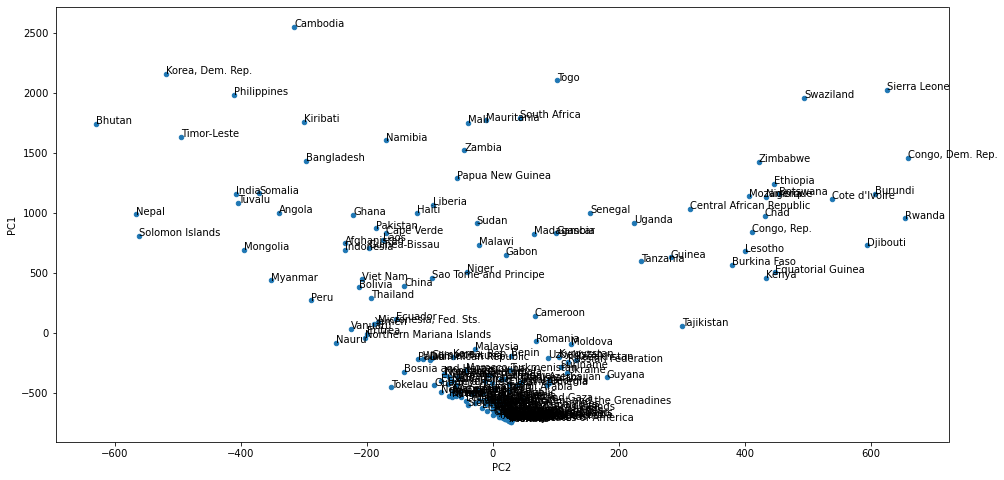

In [8]:
ax = new_data.plot(kind='scatter', x='PC2', y='PC1', figsize=(16,8))

for i, country in enumerate(data.index):
    ax.annotate(country, (new_data.iloc[i].PC2, new_data.iloc[i].PC1))

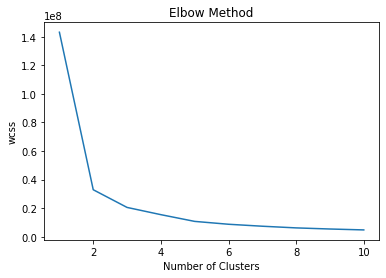

In [10]:
# elbow method to find number of clusers
from sklearn.cluster import KMeans

wcss = [] # wcss - within cluster squared sum of inertia

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=10)
    kmeans.fit(new_data)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("wcss")
plt.show()

In [11]:
# Kmeans Algorithm
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)

In [12]:
kmeans.fit(new_data)

KMeans(n_clusters=3)

In [13]:
kmeans.cluster_centers_

array([[ 811.10727247,   34.75475384],
       [-499.05863515,   -5.74958477],
       [1801.3536003 ,  -52.48773448]])

In [14]:
kmeans.labels_

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       2, 0, 1, 0, 1, 1, 1, 1, 0, 0, 2, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 2, 2, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 2, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 2, 1, 1, 1, 0, 0, 2, 1, 1, 0, 1, 2, 1, 1,
       1, 1, 0, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 2, 2])

In [15]:
new_data["Cluster"] = kmeans.labels_

In [16]:
new_data.head()

,PC1,PC2,Cluster
Sales of Wheat in tons,,,
Afghanistan,744.815213,-235.636419,0
Albania,-595.865592,6.105249,1
Algeria,-551.303760,45.952015,1
American Samoa,-700.700584,8.865202,1
Andorra,-645.423819,1.536970,1


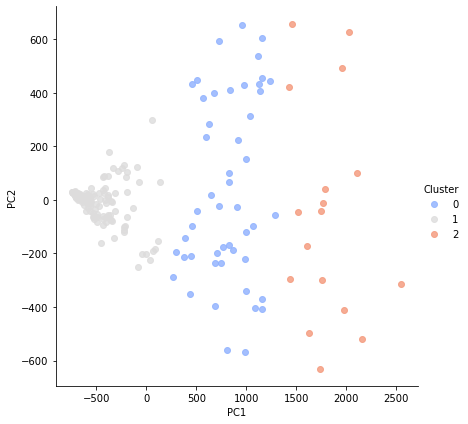

In [17]:
import seaborn as sns
sns.lmplot('PC1', 'PC2', data=new_data, hue='Cluster', palette='coolwarm', size=6, aspect=1, fit_reg=False)

In [20]:
data["Cluster"] = kmeans.labels_
data.sort_values(["Cluster"])

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,Cluster
Sales of Wheat in tons,,,,,,,,,,,,,,,,,,,
Afghanistan,436.0,429.0,422.0,415.0,407.0,397.0,397,387,374,373,346,326,304,308,283.0,267.0,251.0,238.0,0
Madagascar,367.0,368.0,369.0,369.0,370.0,370.0,339,345,346,352,359,371,382,375,384.0,408.0,400.0,417.0,0
Lesotho,225.0,231.0,229.0,228.0,232.0,242.0,248,264,298,518,356,370,399,408,414.0,421.0,408.0,568.0,0
Laos,428.0,424.0,420.0,415.0,411.0,407.0,373,360,352,344,344,337,330,324,313.0,298.0,291.0,289.0,0
Kenya,125.0,120.0,134.0,152.0,177.0,207.0,233,277,313,351,393,384,392,402,410.0,388.0,340.0,319.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cambodia,928.0,905.0,881.0,858.0,836.0,811.0,810,789,777,764,758,750,728,712,696.0,676.0,672.0,664.0,2
"Congo, Dem. Rep.",275.0,306.0,327.0,352.0,376.0,411.0,420,466,472,528,592,643,697,708,710.0,702.0,692.0,666.0,2
"Korea, Dem. Rep.",841.0,828.0,815.0,802.0,788.0,775.0,775,775,775,770,713,650,577,527,499.0,508.0,500.0,441.0,2


In [21]:
new_data.sort_values(["Cluster", "PC1", "PC2"])
new_data.to_csv("Datasets/FMCG_Output.csv", index=True)

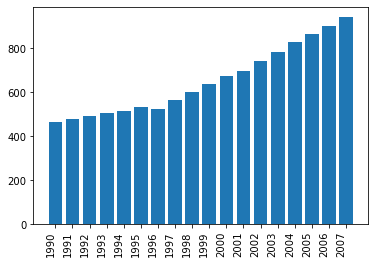

In [22]:
# Largest Importer and constantly increasing
data.loc["Sierra Leone"]
X = data.loc["Sierra Leone"].index[0:18]
Y = data.loc["Sierra Leone"].values[0:18]

plt.bar(X, Y)
plt.setp(plt.gca().get_xticklabels(), rotation=90, horizontalalignment='right') # Rotate Axis Labels

plt.show()

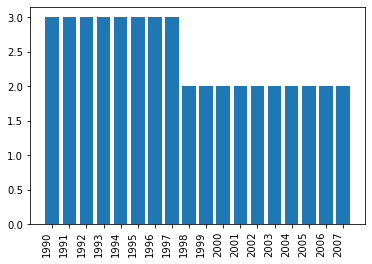

In [23]:
# Most consistent
data.loc["Monaco"]
X = data.loc["Monaco"].index[0:18]
Y = data.loc["Monaco"].values[0:18]

plt.bar(X, Y)
plt.setp(plt.gca().get_xticklabels(), rotation=90, horizontalalignment='right') # Rotate Axis Labels

plt.show()